## Basit Dogrusal Regression

In [1]:
import pandas as pd 
ad = pd.read_csv("Advertising.csv")
df = ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
df = df.iloc[:,1:len(df)] # index hatasi duzeltildi

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [6]:
df.isnull().values.any() 

False

In [7]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [8]:
import seaborn as sns
sns.pairplot(df, kind = "reg")

* *TV ile satislar arasindaki iliski dikkat ceker.*

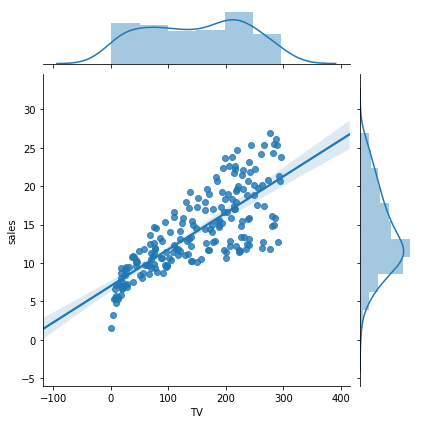

In [9]:
sns.jointplot(x = "TV", y = "sales", kind = "reg", data = df)

In [10]:
import statsmodels.api as sm

In [11]:
X = df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [12]:
X = sm.add_constant(X)
X.head()

C:\Users\90530\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [13]:
y = df["sales"] # sales bagimli degisken olarak aldik
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [14]:
lm = sm.OLS(y,X)

In [15]:
model = lm.fit()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 27 Feb 2021   Prob (F-statistic):           1.47e-42
Time:                        18:07:50   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model.params # katsayilar...

const    7.032594
TV       0.047537
dtype: float64

In [18]:
model.conf_int() #katsayi guvenilirligi

,0,1
const,6.129719,7.935468
TV,0.042231,0.052843


In [19]:
model.mse_model 

3314.618166868649

In [20]:
model.rsquared

0.611875050850071

In [56]:
model.fittedvalues[0:5] # tahmin degerleri...

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [57]:
Y[0:5] # gercek degerler

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [58]:
print("Sales = " + str(model.params[0]) + str(" + ") + str(model.params[1]) + str("x")) # model denklemi

Sales = 7.032593549127695 + 0.047536640433019736x


### Sklearn ile dogrusal regression

In [21]:
from sklearn.linear_model import LinearRegression

In [23]:
X = df[["TV"]]
y = df[["sales"]]
reg = LinearRegression()
model = reg.fit(X,y)
print("ksatsayilar = " +str(model.intercept_)+  str(model.coef_[0]))
#model.intercept_
#model.coef_


ksatsayilar = [7.03259355][0.04753664]


In [24]:
model.score(X,y) # r**2

0.611875050850071

In [25]:
model.predict(X)[0:10] # ilk 10 tahmin

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])

#### Tahmın Bolumu

Model Denklemi: 
sales = 7.03 + TV * 0.04

Soru: 40 birim TV harcamasi satisi nasil etkiler?

In [70]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X,y)

In [71]:
7.03 + 40*(0.04)

8.63

In [72]:
model.predict([[40]])

array([8.93405917])

Biz kolay işlem olsun diye virgulden sonra 2 basamagi isleme soktuk fakat model daha hassas hesapladi. Aradaki farkin sebebi

In [73]:
yeni_data = [[5], [20], [60]]

In [74]:
model.predict(yeni_data) # birden fazla girdinin tahminini aldik

array([7.27027675, 7.98332636, 9.88479198])

## Artıklar ve Makine Öğrenmesindeki Önemi

In [75]:
reg.predict(X)[0:10] 
# OOP den dolayi yukarida yazdigimiz için model.predict yerine reg.predict kullanilabilir

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [76]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [77]:
control_table = pd.DataFrame({"gercek_y": y[0:10],"tahmin_y": reg.predict(X)[0:10]} )

In [78]:
control_table

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [80]:
control_table["hata_payi"] = control_table["gercek_y"] - control_table["tahmin_y"]

In [81]:
control_table

,gercek_y,tahmin_y,hata_payi
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


Hata paylari su durumda toplamak dogru sonuc vermez cünkü hatalar yonlu olarak belirtilmis.Negatif pozitif degerlerin biririni goturmemesi lazım.

In [84]:
control_table["hata_kare"] = control_table["hata_payi"]**2
# negatif buyuklukleri toplanirken korumak icin kare alindi

In [85]:
control_table

,gercek_y,tahmin_y,hata_payi,hata_payi_2,hata_kare
0,22.1,17.970775,4.129225,17.050503,17.050503
1,10.4,9.147974,1.252026,1.567569,1.567569
2,9.3,7.850224,1.449776,2.101851,2.101851
3,18.5,14.234395,4.265605,18.195390,18.195390
4,12.9,15.627218,-2.727218,7.437719,7.437719
5,7.2,7.446162,-0.246162,0.060596,0.060596
6,11.8,9.765950,2.034050,4.137358,4.137358
7,13.2,12.746498,0.453502,0.205664,0.205664
8,4.8,7.441409,-2.641409,6.977040,6.977040
9,10.6,16.530414,-5.930414,35.169814,35.169814


In [88]:
import numpy as np
np.sum(control_table["hata_kare"])
# toplam hata

92.90350329638103

In [89]:
np.mean(control_table["hata_kare"])
# Hata kare ortalamasi

9.290350329638105

In [90]:
np.sqrt(np.mean(control_table["hata_kare"]))

3.048007599996776